In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [3]:
NUM_CLASSES = 24

# Dataset reading

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

2022-09-21 21:35:56.721352: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 24)                264       
                                                                 
Total params: 1,334
Trainable params: 1,334
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
63/65 [============================>.] - ETA: 0s - loss: 3.1786 - accuracy: 0.0722
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
65/65 [==============================] - 1s 11ms/step - loss: 3.1778 - accuracy: 0.0723 - val_loss: 3.1193 - val_accuracy: 0.0976
Epoch 2/1000
56/65 [========================>.....] - ETA: 0s - loss: 3.1036 - accuracy: 0.1039
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
65/65 [==============================] - 0s 4ms/step - loss: 3.0957 - accuracy: 0.1035 - val_loss: 3.0122 - val_accuracy: 0.1161
Epoch 3/1000
62/65 [===========================>..] - ETA: 0s - loss: 2.9912 - accuracy: 0.1104
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
65/65 [==============================] - 0s 5ms/step - loss: 2.9864 - accuracy: 0.1117 - val_loss: 2.8383 - val_accuracy: 0.1618
Epoch 4/1000
59/65 [==========================>...] - ETA: 0s - loss: 2.8457 - accuracy: 0.1304


In [12]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

22/22 [==============================] - 0s 983us/step - loss: 1.2670 - accuracy: 0.5909


In [13]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [14]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 96ms/step
[6.7151082e-03 2.2403160e-02 3.7520165e-03 3.7911437e-02 1.2550379e-02
 1.4683558e-02 6.5022025e-05 1.4593752e-04 2.1876542e-04 1.8589689e-01
 1.7513338e-02 5.1100538e-03 1.3274085e-02 1.7654123e-03 7.5377570e-06
 3.3474778e-05 1.8494587e-01 9.7111519e-03 7.3490031e-03 1.4739689e-01
 2.8202710e-01 4.4978678e-02 7.7732647e-04 7.6787843e-04]
20


# Confusion matrix

87/87 [==============================] - 0s 1ms/step


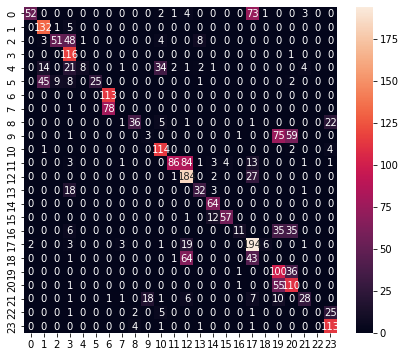

Classification Report
              precision    recall  f1-score   support

           0       0.96      0.38      0.55       136
           1       0.68      0.96      0.79       138
           2       0.84      0.44      0.58       115
           3       0.50      0.99      0.66       117
           4       0.89      0.09      0.16        88
           5       1.00      0.28      0.43        90
           6       0.59      1.00      0.74       113
           7       0.00      0.00      0.00        79
           8       0.86      0.55      0.67        66
           9       0.14      0.02      0.04       139
          10       0.68      0.94      0.79       121
          11       0.95      0.44      0.60       197
          12       0.51      0.86      0.64       214
          13       0.71      0.59      0.65        54
          14       0.75      1.00      0.86        64
          15       0.93      0.81      0.87        70
          16       0.79      0.13      0.22        87
     

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [16]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [17]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: /var/folders/g7/z_b90041623_90_9qd8xq9l80000gn/T/tmpql6kwun3/assets


2022-09-21 21:36:24.282629: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:362] Ignored output_format.
2022-09-21 21:36:24.282663: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:365] Ignored drop_control_dependency.
2022-09-21 21:36:24.292575: I tensorflow/cc/saved_model/reader.cc:43] Reading SavedModel from: /var/folders/g7/z_b90041623_90_9qd8xq9l80000gn/T/tmpql6kwun3
2022-09-21 21:36:24.306231: I tensorflow/cc/saved_model/reader.cc:81] Reading meta graph with tags { serve }
2022-09-21 21:36:24.306268: I tensorflow/cc/saved_model/reader.cc:122] Reading SavedModel debug info (if present) from: /var/folders/g7/z_b90041623_90_9qd8xq9l80000gn/T/tmpql6kwun3
2022-09-21 21:36:24.315795: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:354] MLIR V1 optimization pass is not enabled
2022-09-21 21:36:24.317833: I tensorflow/cc/saved_model/loader.cc:228] Restoring SavedModel bundle.
2022-09-21 21:36:24.399857: I tensorflow/cc/saved_model/loader.

7368

# Inference test

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [19]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 1.11 ms, sys: 1.56 ms, total: 2.66 ms
Wall time: 2.4 ms


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[6.7151110e-03 2.2403143e-02 3.7520127e-03 3.7911408e-02 1.2550371e-02
 1.4683543e-02 6.5022025e-05 1.4593752e-04 2.1876564e-04 1.8589693e-01
 1.7513355e-02 5.1100515e-03 1.3274085e-02 1.7654123e-03 7.5377570e-06
 3.3474746e-05 1.8494578e-01 9.7111575e-03 7.3490064e-03 1.4739694e-01
 2.8202710e-01 4.4978675e-02 7.7732722e-04 7.6787919e-04]
20
